# SFR & Kennicutt-Schmidt law

In [1]:
import os
import numpy as np
from IPython.display import Image
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


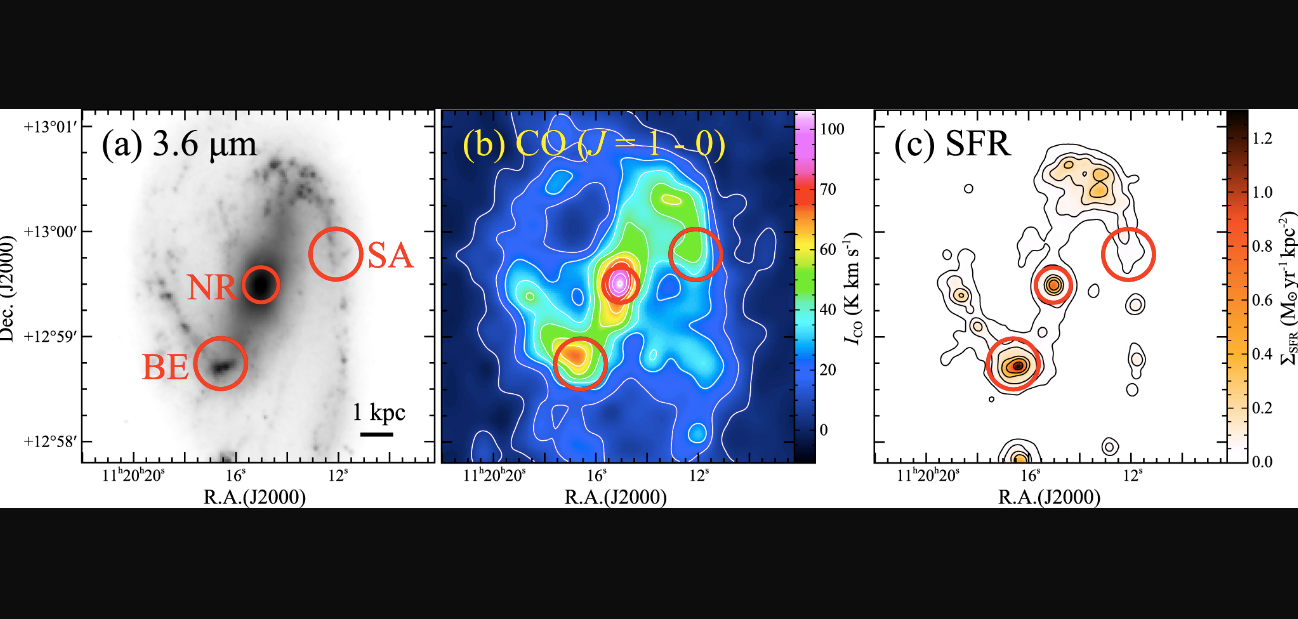

In [2]:
Image(filename='./images/CO_SFR.png')

### SFR

 $$\frac{SFR}{M_{\odot}yr^{-1}} = 5.37\times 10^{-42} \frac{L_{H\alpha}}{erg \times s^{-1}}$$

$$\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}] $$

$$L(H_{\alpha}) = 4\pi (3.086\times 10^{24} d_L)^2 f(H_{\alpha})$$, where f(Hα) is the integrated flux in ergs s-1 cm-2 and dL is the luminosity distance in Mpc

In [3]:
Distance = 9.3
H_alpha = np.load('./data/H_alpha.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [4]:
scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec
print(scale)
d_L = scale*800

0.04508767234318684


In [5]:
SFR = np.zeros(dist_kpc.shape)
SFR = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * H_alpha 

In [8]:
Sigma_SFR = np.zeros(dist_kpc.shape)
Sigma_SFR = SFR/(scale)**2

np.save('./data/Sigma_SFR.npy',Sigma_SFR)

Text(0.5, 1.0, '$\\Sigma_{SFR}$')

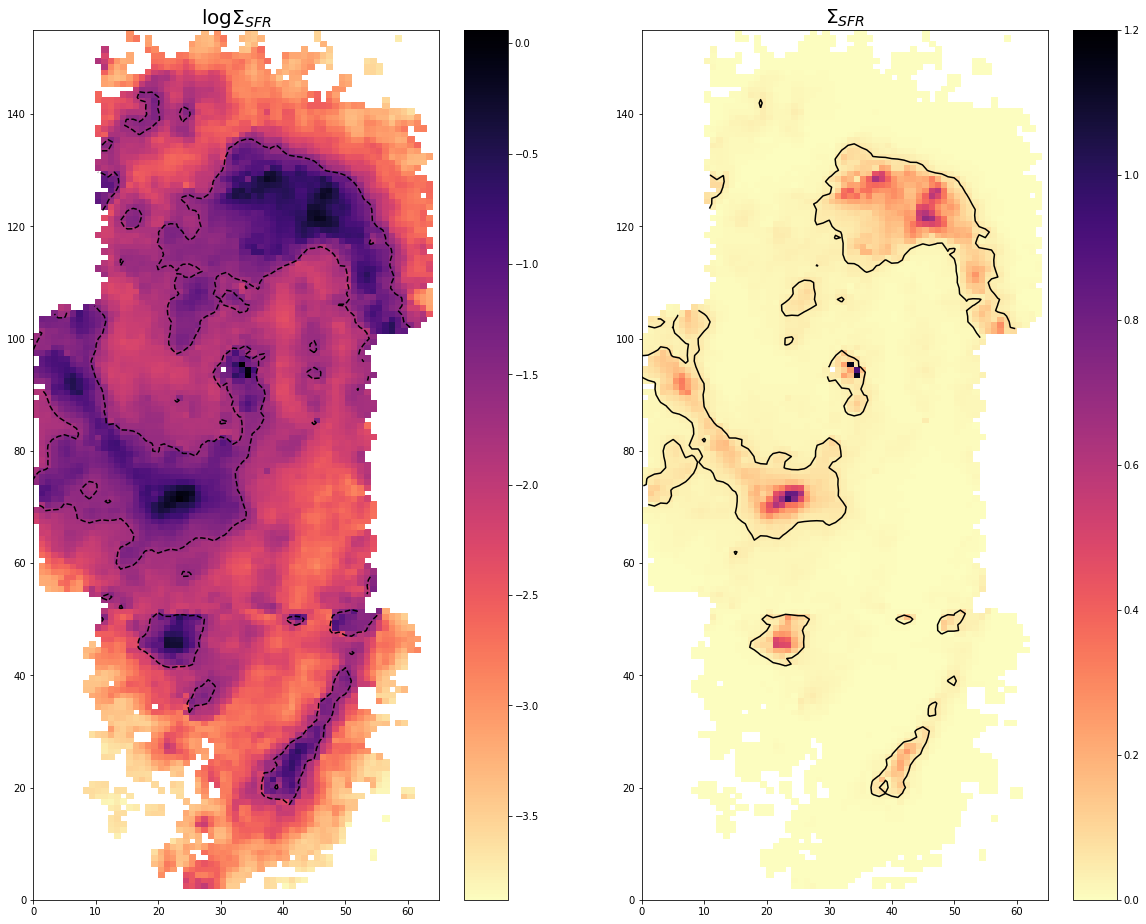

In [9]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[20, 16])
plt.subplot(1,2,1)

CS = plt.contour(X, Y, np.log10(Sigma_SFR), levels=[-1.6,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(Sigma_SFR), cmap='magma_r')

quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\log{\Sigma_{SFR}}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,],aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, Sigma_SFR, cmap='magma_r')
quadmesh.set_clim(vmin=0.,vmax = 1.2)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\Sigma_{SFR}$', fontsize=20)

Правая картинка(без логарифма) похожа на ту, которую я представила вверху из [этой статьи](https://arxiv.org/pdf/1904.12430.pdf)

Загрузим карту с ошибками

In [10]:
from astropy.io import fits

In [11]:
data=fits.getdata('./data/NGC3627_map_ha_corr_err.fits')             
data=np.nan_to_num(data)
Halpha_err_ = np.array(data).reshape(data.shape)


In [12]:
Halpha_err = Halpha_err_[5:,3:-1]
np.save('./data/H_alpha_err.npy', Halpha_err)

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5, 1.0, '$H_{\\alpha}$')

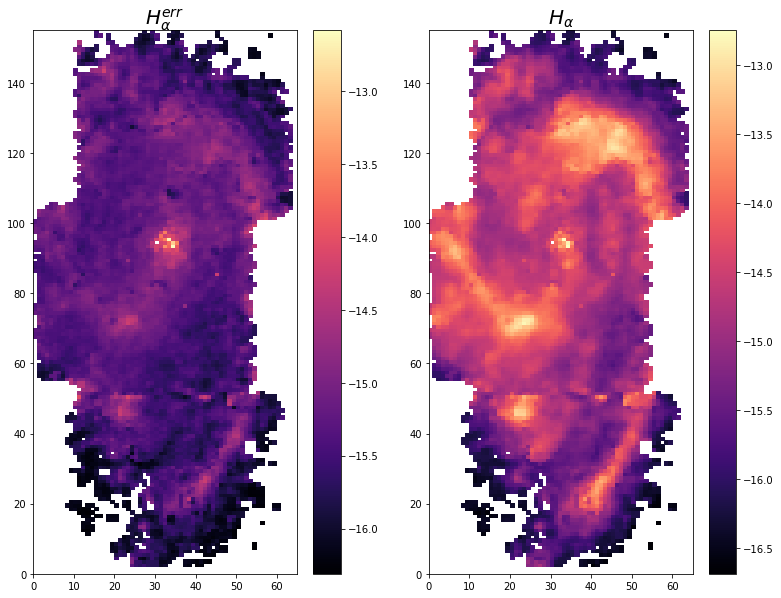

In [13]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[13, 10])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, np.log10(Halpha_err), cmap='magma')
plt.colorbar()
plt.title(r'$H_{\alpha}^{err}$', fontsize=20)

plt.subplot(1,2,2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='magma')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)

Относительная ошибка

In [14]:
SFR_rel_err = np.zeros(H_alpha.shape)
SFR_rel_err = Halpha_err/H_alpha

Text(0.5, 1.0, '$SFR^{err}$')

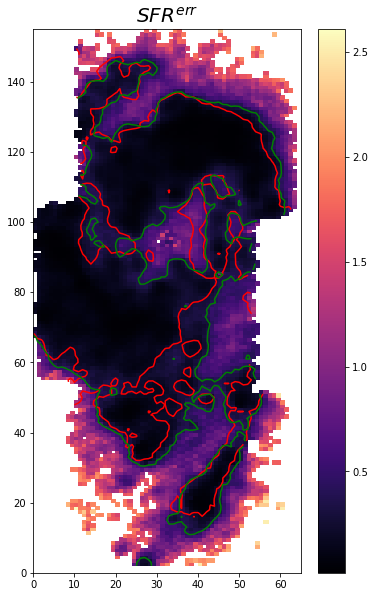

In [15]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[6, 10])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.01,],aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, SFR_rel_err, levels=[0.,0.4],aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, SFR_rel_err, cmap='magma')
plt.colorbar()
plt.title(r'$SFR^{err}$', fontsize=20)

Абсолютная ошибка 

In [16]:
SFR_abs_err = np.zeros(H_alpha.shape)
SFR_abs_err_ = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * Halpha_err 
SFR_abs_err = SFR_abs_err_/(scale)**2

Text(0.5, 1.0, '$SFR^{err}$')

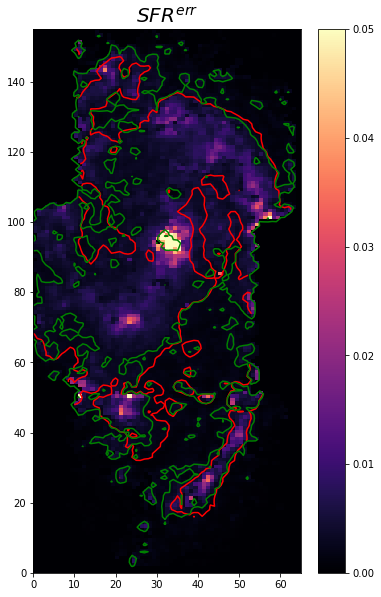

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[6, 10])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.01,],aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, SFR_abs_err, levels=[0.0025, 0.05],aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, SFR_abs_err, cmap='magma')
plt.colorbar()
quadmesh.set_clim(vmin=0.,vmax = 0.05)
plt.title(r'$SFR^{err}$', fontsize=20)

/home/lera/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/lera/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/lera/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lera/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


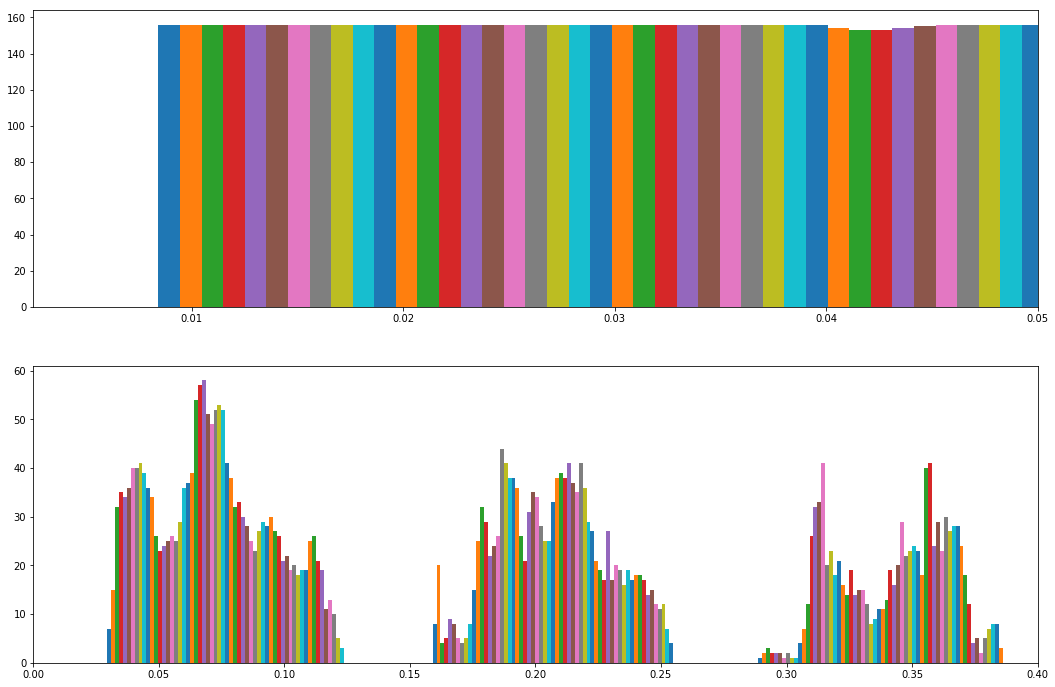

In [18]:
plt.figure(figsize=[18, 12])
plt.subplot(2,1,1)
plt.hist(SFR_abs_err, bins = 20,cumulative = False)
plt.xlim(0.0025,0.05)

plt.subplot(2,1,2)
plt.hist(SFR_rel_err, bins = 20)
plt.xlim(0,0.4)
plt.show()

### Изобразим закон К-Ш для полной и обрезанной карты

$$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$$, где $N=1.4,1.5$ 

Пусть $\Sigma_{SFR} = k\cdot {\Sigma_{gas}}^N$, тогда $\log{H_{\alpha}} = \log{k}+N\cdot log{\Sigma_{gas}}$

In [20]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


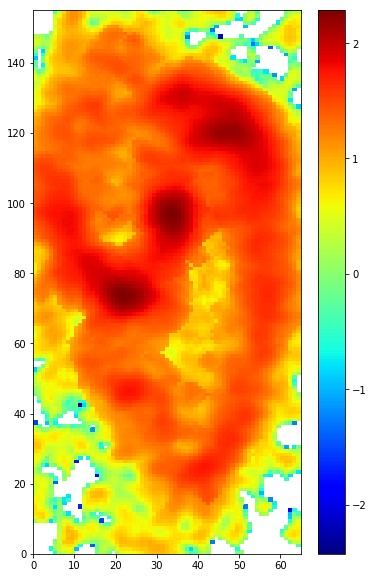

In [21]:
mask = (H_alpha != 0.)
Sigma_g = np.zeros(dist_kpc.shape)
Sigma_g = 1.36*(Sigma_HI + Sigma_H2)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[6,10])
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g), cmap='jet')
plt.colorbar()

In [10]:
counts = np.zeros((50,30)) 
counts_cut = np.zeros((50,30))

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                
                if (dist_kpc[k][l] <= 5) & (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts_cut[i][j]+=1    

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Нарисуем закон К-Ш почти для полной и обрезанной карты

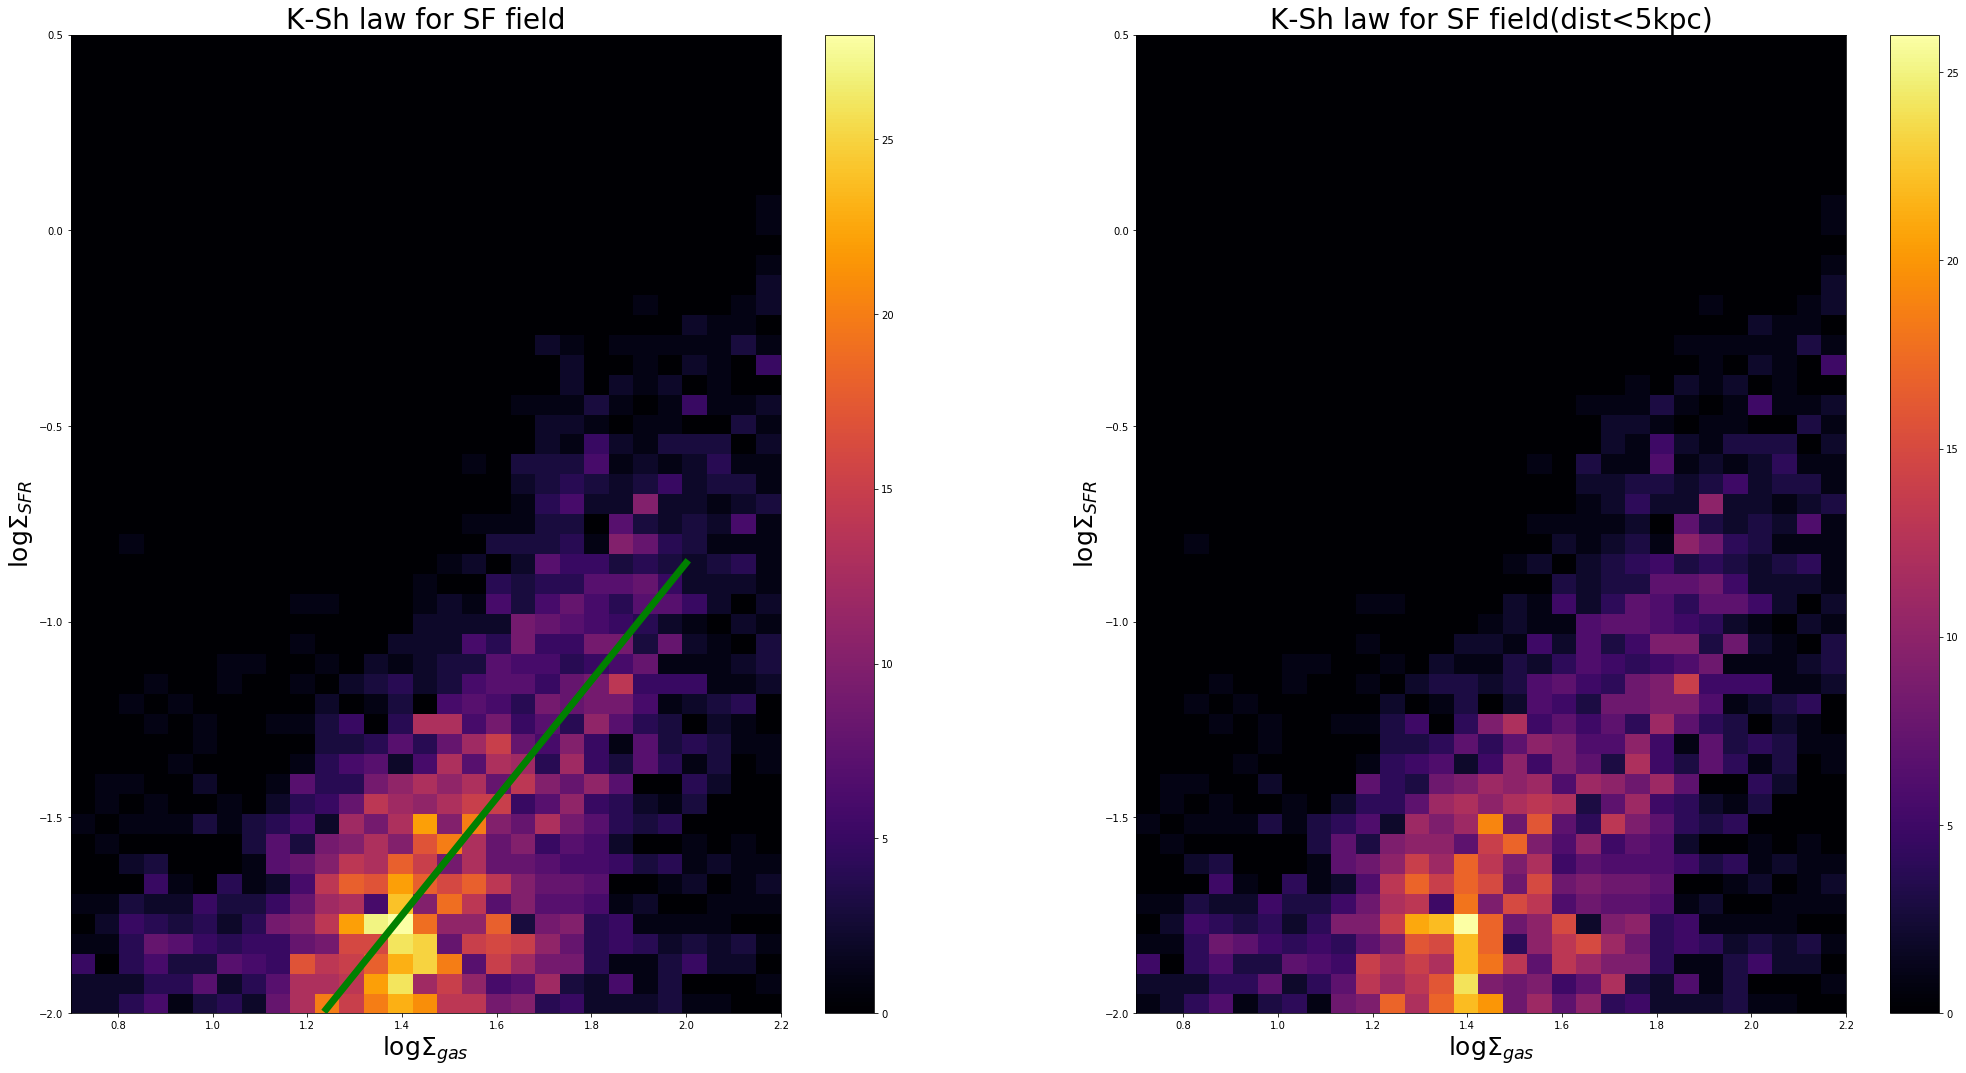

In [11]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a = 1.5
b = -3.85
#В принципе похоже на закон К-Ш со степенью N=1.5,
plt.plot([1.24, 2.], [1.24*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()
          
plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(xx, yy, counts_cut, cmap='inferno')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field(dist<5kpc)', fontsize=28)
plt.colorbar()

In [64]:
counts = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.7, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [65]:
from scipy.optimize import curve_fit
def func(x, beta,alpha):
    return alpha*x + beta

#guesses = [3.85, 1.5]
popt,pcov = curve_fit(func,y,x)#,p0=guesses)
a =1. / popt[1]
b = -popt[0]/popt[1]
print (popt,pcov)

[2.18160449 0.42488109] [[0.00025995 0.00016299]
 [0.00016299 0.00010953]]


$$log(\Sigma_{gas}) = \alpha \times log(\Sigma_{SFR}) + \beta$$
$$log(\Sigma_{SFR}) = \dfrac{1}{\alpha} \times log(\Sigma_{gas}) - \dfrac{\beta}{\alpha}$$

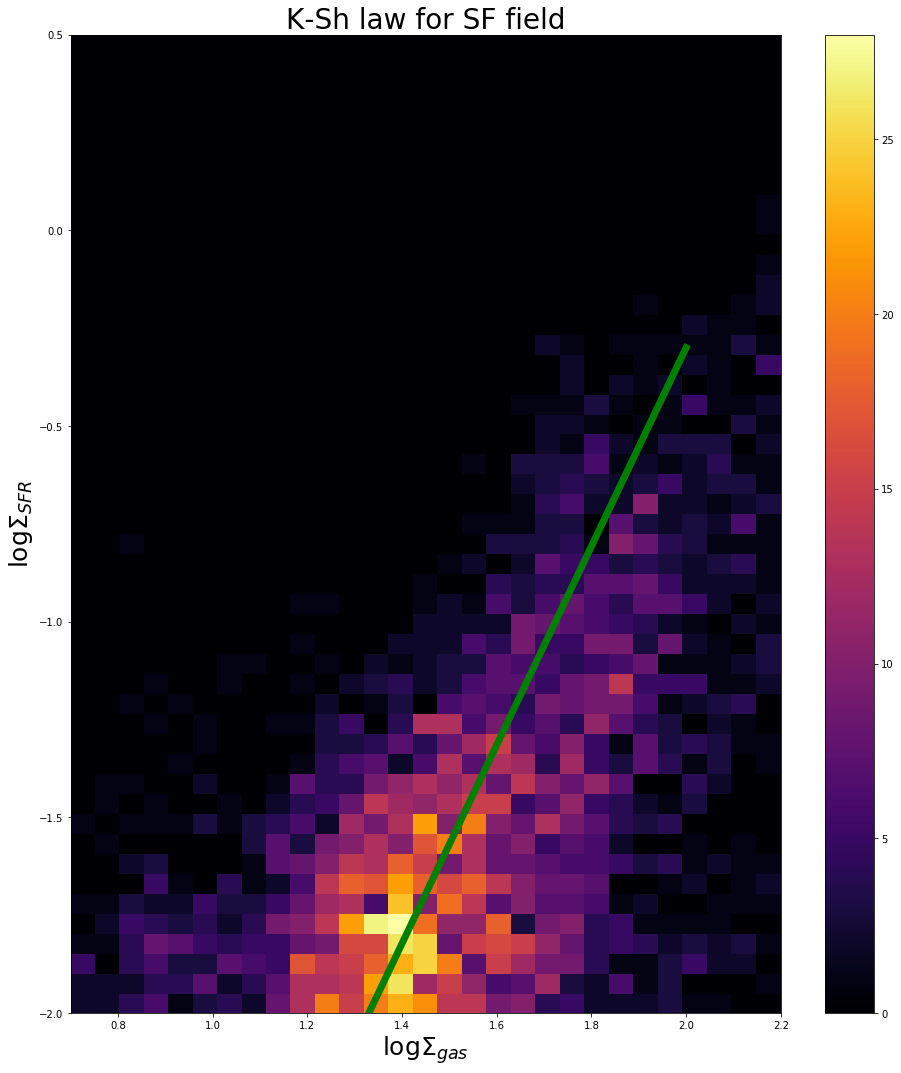

In [21]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a = 1./0.425
b = -2.18/0.425
#В принципе похоже на закон К-Ш со степенью N=1.5,
plt.plot([-2.*0.425+2.18,2.], [-2., a*2.+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

In [14]:
def func(x, beta,alpha):
    return alpha*x + beta

Найдём зависимость угла наклона от порогового значения $\Sigma_{SFR}$

In [17]:
from scipy.optimize import curve_fit
inclin = []


SFR_lim = np.array(np.linspace(0.01,0.06,100))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (0.7 <= np.log10(Sigma_g[k][l])) & (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin.append(1./popt[1])

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

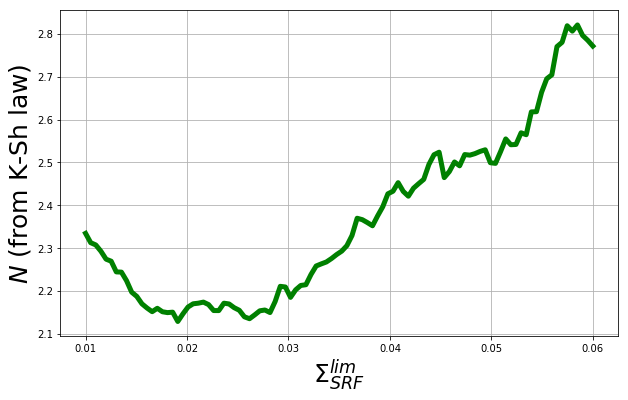

In [18]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin, '-', lw=5, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


In [21]:
from scipy.optimize import curve_fit
inclin = []


SFR_lim = np.array(np.linspace(0.01,0.06,100))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin.append(1./popt[1])

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

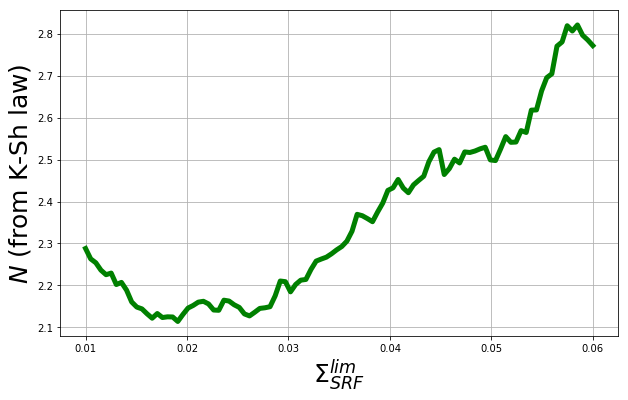

In [22]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin, '-', lw=5, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


Расширим предел SFR


In [24]:
from scipy.optimize import curve_fit
inclin = []


SFR_lim = np.array(np.linspace(0.002,0.2,200))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin.append(1./popt[1])

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

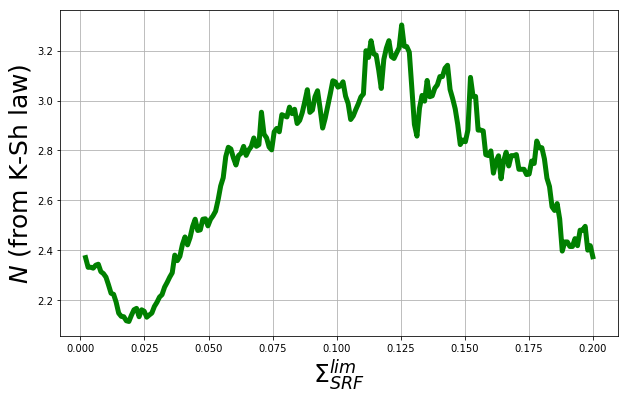

In [25]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin, '-', lw=5, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


In [58]:
from scipy.optimize import curve_fit
inclin_gas = []
std_gas = []

SFR_lim = np.array(np.linspace(0.002,0.2,200))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_gas.append(1./popt[1])
    std_gas.append(np.sqrt(np.diag(pcov))[0])   

inclin_HI = []
std_HI = []
for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_HI[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_HI.append(1./popt[1])    
    std_HI.append(np.sqrt(np.diag(pcov))[0])      
    
inclin_H2 = []
std_H2 = []
for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.) & (Sigma_H2[k][l] > 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_H2[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_H2.append(1./popt[1])  
    std_H2.append(np.sqrt(np.diag(pcov))[0]) 

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

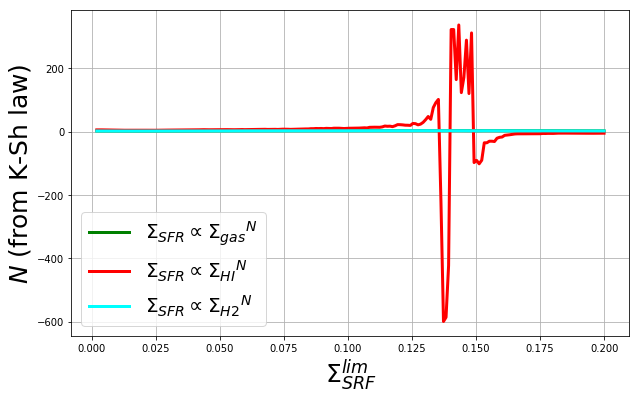

In [47]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin_gas, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$', lw=3, color='g')
plt.plot(SFR_lim, inclin_HI, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{HI}}^N$', lw=3, color='r')
plt.plot(SFR_lim, inclin_H2, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{H2}}^N$', lw=3, color='aqua')
plt.legend(fontsize=20)
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


(0.0, 15.0)

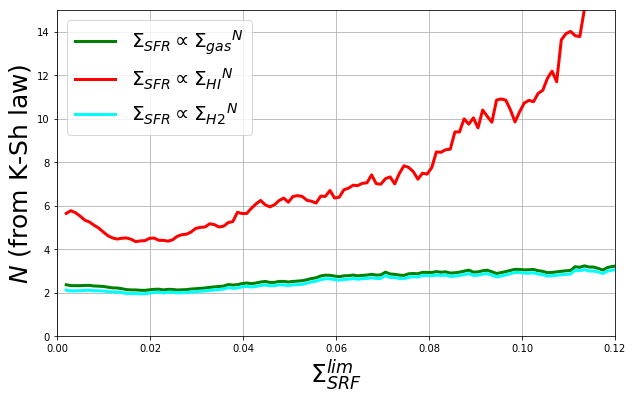

In [59]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin_gas, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$', lw=3, color='g')
plt.fill_between(np.array(SFR_lim), 
                     np.array(inclin_gas) - np.array(std_gas), 
                     np.array(inclin_gas) + np.array(std_gas), alpha=0.3, color='g')
plt.plot(SFR_lim, inclin_HI, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{HI}}^N$', lw=3, color='r')
plt.fill_between(SFR_lim, 
                     np.array(inclin_HI) - np.array(std_HI), 
                     np.array(inclin_HI) + np.array(std_HI), alpha=0.3, color='r')
plt.plot(SFR_lim, inclin_H2, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{H2}}^N$', lw=3, color='aqua')
plt.fill_between(SFR_lim, 
                     np.array(inclin_H2) - np.array(std_H2), 
                     np.array(inclin_H2) + np.array(std_H2), alpha=0.3, color='aqua')
plt.legend(fontsize=20)
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)
plt.xlim(0,0.12)
plt.ylim(0.,15.)

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

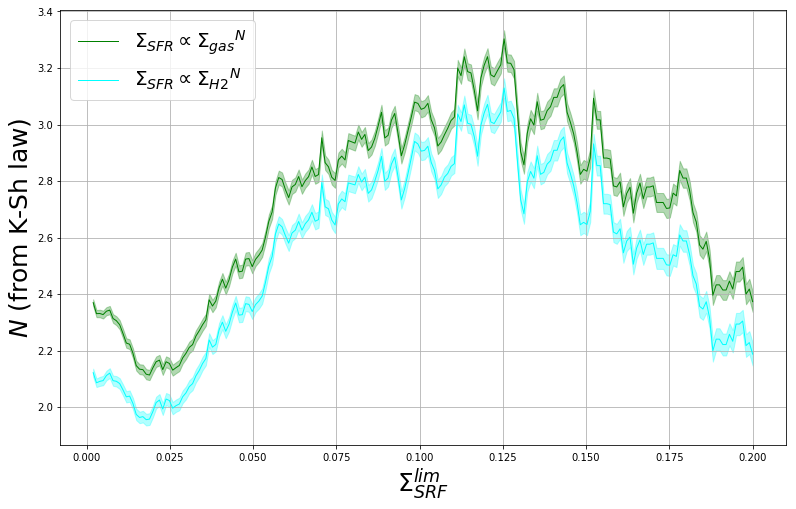

In [61]:
fig = plt.figure(figsize=[13, 8])
plt.plot(SFR_lim, inclin_gas, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$', lw=1, color='g')
plt.fill_between(np.array(SFR_lim), 
                     np.array(inclin_gas) - np.array(std_gas), 
                     np.array(inclin_gas) + np.array(std_gas), alpha=0.3, color='g')
plt.plot(SFR_lim, inclin_H2, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{H2}}^N$', lw=1, color='aqua')
plt.fill_between(SFR_lim, 
                     np.array(inclin_H2) - np.array(std_H2), 
                     np.array(inclin_H2) + np.array(std_H2), alpha=0.3, color='aqua')
plt.legend(fontsize=20)
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)

In [46]:
from scipy.optimize import curve_fit
inclin_gas = []
std_gas = []

SFR_lim = np.array(np.linspace(0.002,0.5,600))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_gas.append(1./popt[1])
    std_gas.append(np.sqrt(np.diag(pcov))[0]) 
    
inclin_HI = []
std_HI = []
for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_HI[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_HI.append(1./popt[1])    
    std_HI.append(np.sqrt(np.diag(pcov))[0])      
    
inclin_H2 = []
std_H2 = []
for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.) & (Sigma_H2[k][l] > 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_H2[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_H2.append(1./popt[1])  
    std_H2.append(np.sqrt(np.diag(pcov))[0])     

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

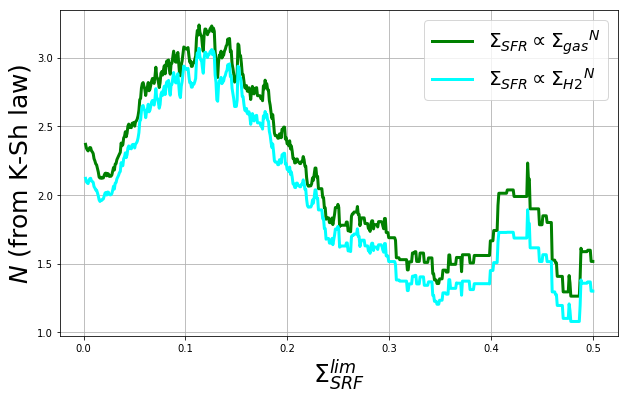

In [48]:
fig = plt.figure(figsize=[10, 6])
plt.plot(SFR_lim, inclin_gas, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{gas}}^N$', lw=3, color='g')
plt.plot(SFR_lim, inclin_H2, '-',label=r'$\Sigma_{SFR}\propto {\Sigma_{H2}}^N$', lw=3, color='aqua')
plt.legend(fontsize=20)
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)



In [63]:
counts1 = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.5, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-3.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts1[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                        
popt1,pcov = curve_fit(func,y,x)
a1 = 1./popt1[1]
b1 = -popt1[0]/popt1[1]

counts2 = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.5, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.5, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts2[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                        
popt2,pcov = curve_fit(func,y,x)
a2 = 1./popt2[1]
b2 = -popt2[0]/popt2[1]

counts3 = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.5, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-1.8, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts3[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                        
popt3,pcov = curve_fit(func,y,x)
a3 = 1./popt3[1]
b3 = -popt3[0]/popt3[1]


counts4 = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.5, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-1.6, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts4[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                        
popt4,pcov = curve_fit(func,y,x)
a4 = 1./popt4[1]
b4 = -popt4[0]/popt4[1]


counts5 = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.5, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-1.5, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts5[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))
                        
popt5,pcov = curve_fit(func,y,x)
a5 = 1./popt5[1]
b5 = -popt5[0]/popt5[1]

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log10
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in log10
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log10


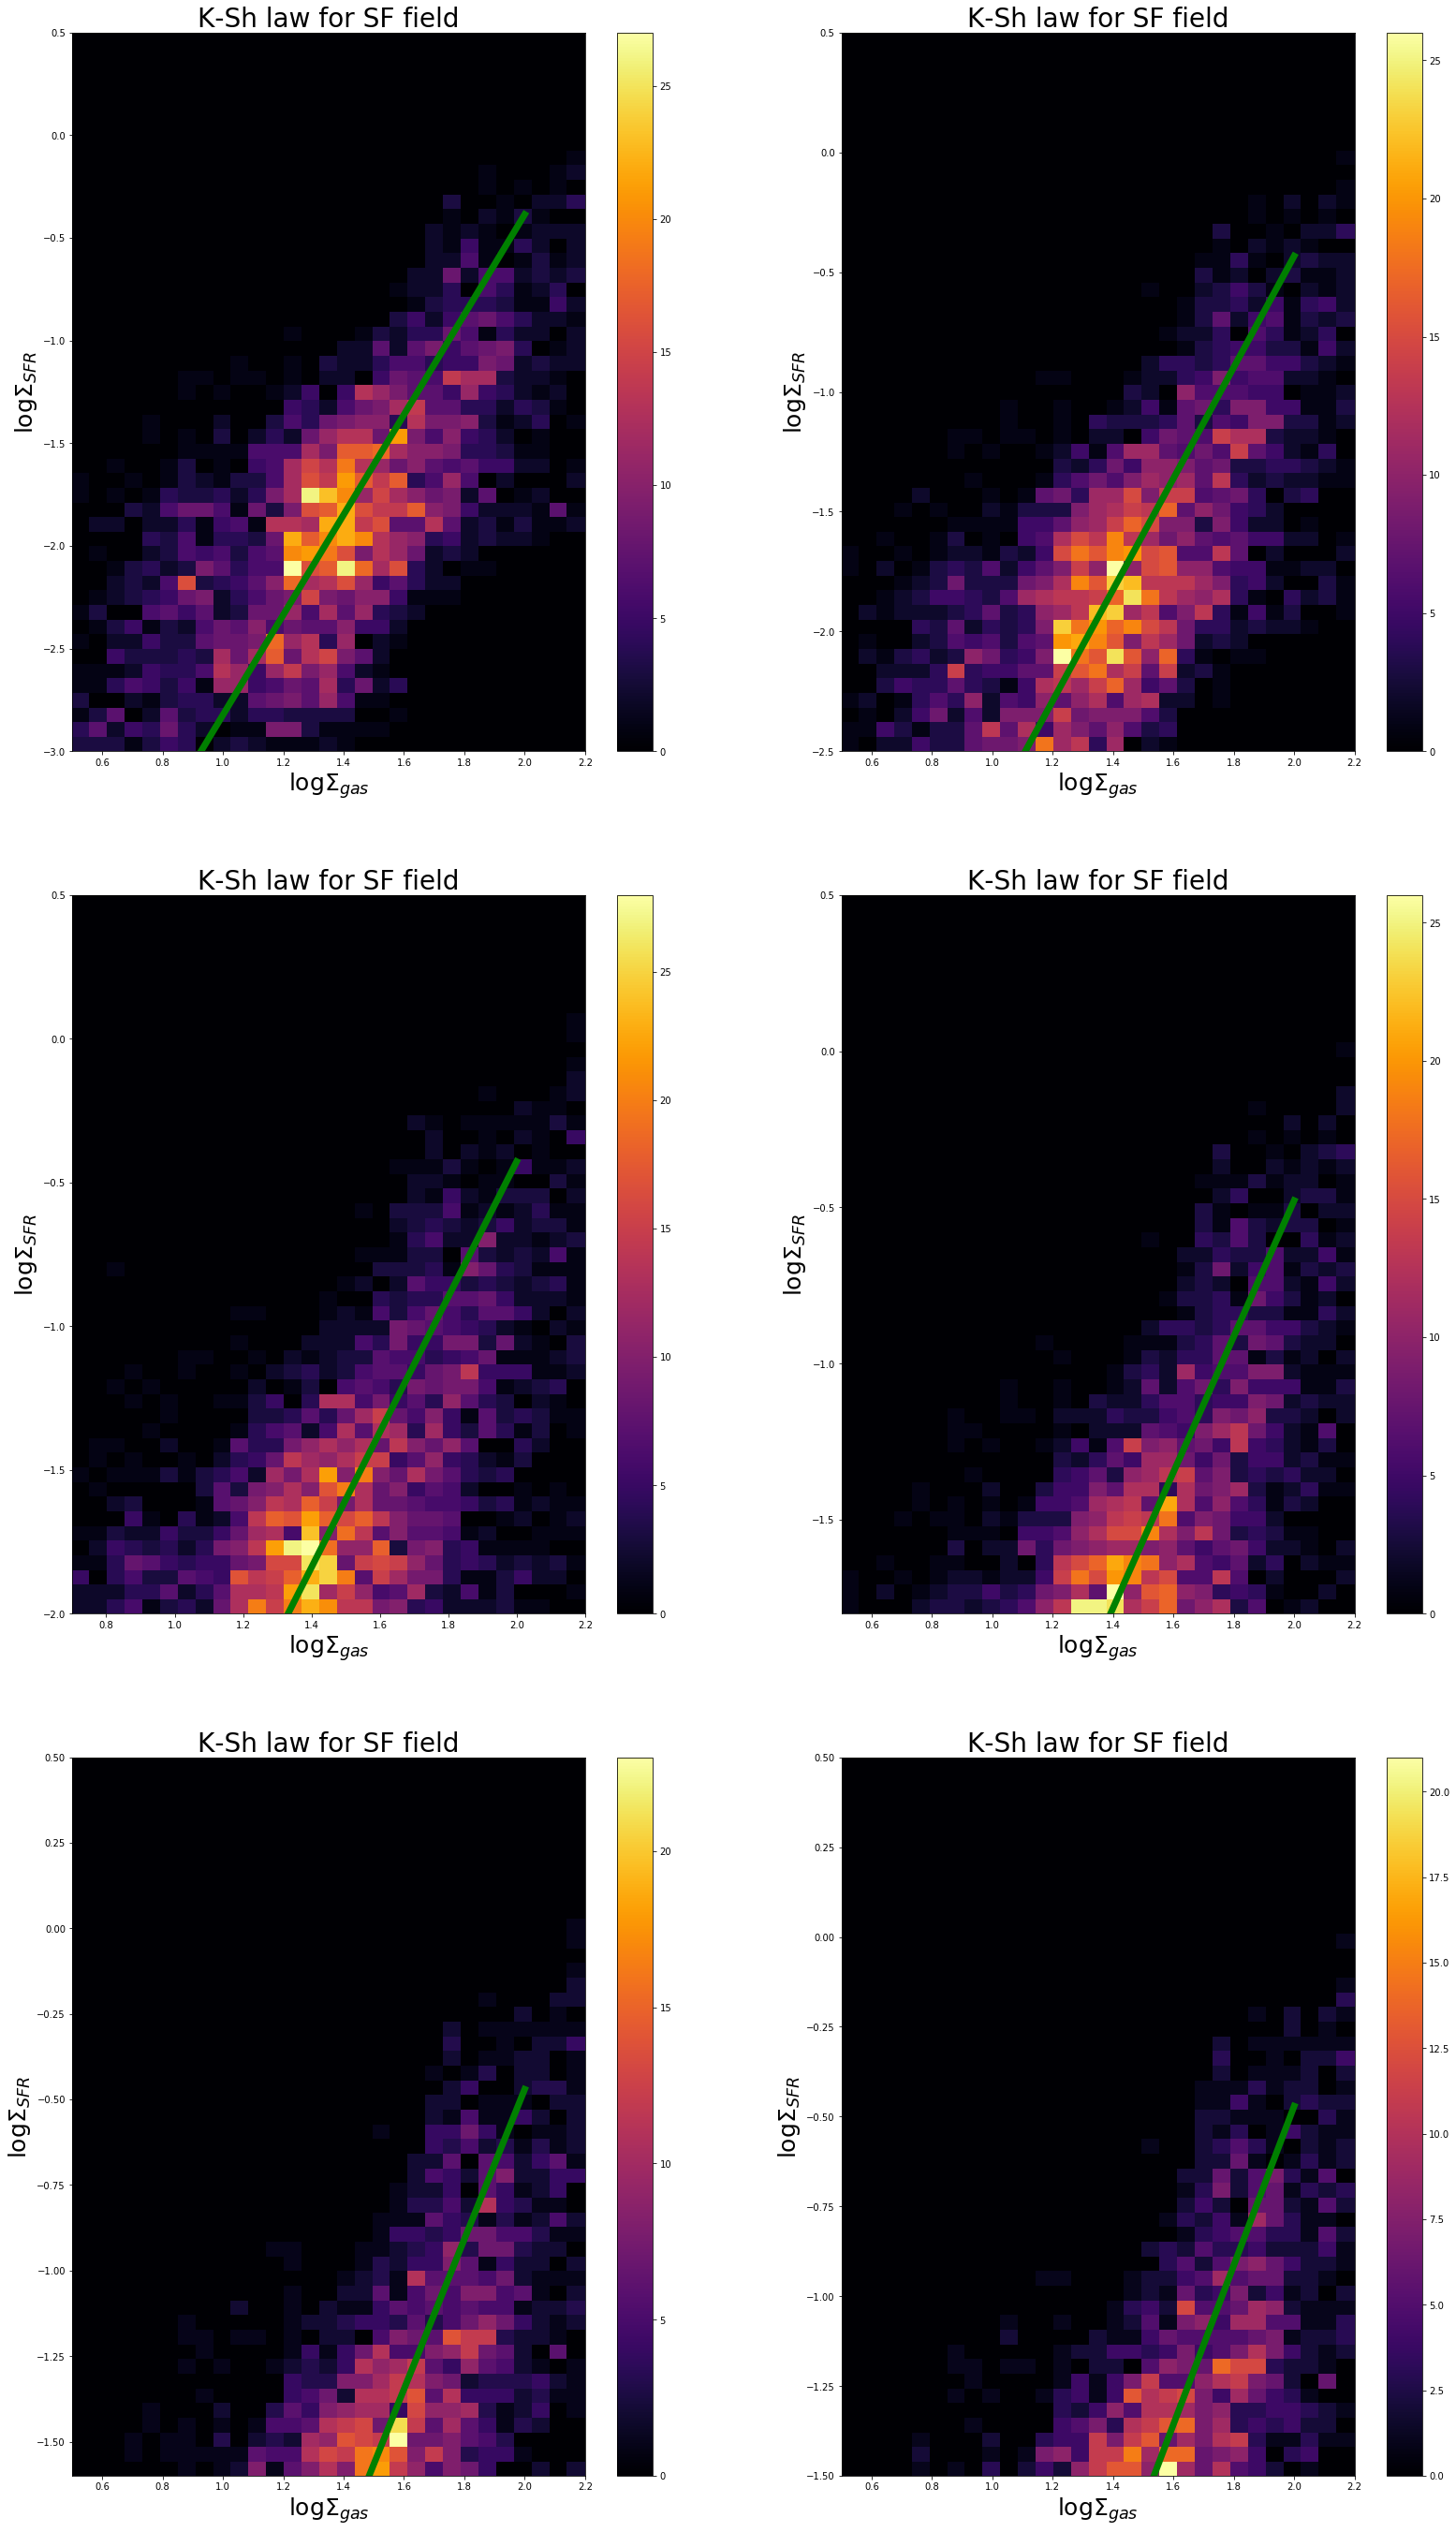

In [70]:
xx1, yy1 = np.meshgrid(np.linspace(0.5, 2.2, 30),np.linspace(-3., 0.5, 50))
fig = plt.figure(figsize=[27, 48])

plt.subplot(3,2,1)

quadmesh = plt.pcolormesh(xx1, yy1, counts1, cmap='inferno')
a0=popt1[1]*(-3.)+popt1[0]
plt.plot([a0, 2.], [a0*a1+b1, 2.*a1+b1], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()
          
plt.subplot(3,2,2)
xx2, yy2 = np.meshgrid(np.linspace(0.5, 2.2, 30),np.linspace(-2.5, 0.5, 50))
quadmesh = plt.pcolormesh(xx2, yy2, counts2, cmap='inferno')
a0=popt2[1]*(-2.5)+popt2[0]
plt.plot([a0, 2.], [a0*a2+b2, 2.*a2+b2], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

plt.subplot(3,2,3)
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a0=popt[1]*(-2.)+popt[0]
plt.plot([a0, 2.], [a0*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

plt.subplot(3,2,4)
xx3, yy3 = np.meshgrid(np.linspace(0.5, 2.2, 30),np.linspace(-1.8, 0.5, 50))
quadmesh = plt.pcolormesh(xx3, yy3, counts3, cmap='inferno')
a0=popt3[1]*(-1.8)+popt3[0]
plt.plot([a0, 2.], [a0*a3+b3, 2.*a3+b3], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

plt.subplot(3,2,5)
xx4, yy4 = np.meshgrid(np.linspace(0.5, 2.2, 30),np.linspace(-1.6, 0.5, 50))
quadmesh = plt.pcolormesh(xx4, yy4, counts4, cmap='inferno')
a0=popt4[1]*(-1.6)+popt4[0]
plt.plot([a0, 2.], [a0*a4+b4, 2.*a4+b4], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

plt.subplot(3,2,6)
xx5, yy5 = np.meshgrid(np.linspace(0.5, 2.2, 30),np.linspace(-1.5, 0.5, 50))
quadmesh = plt.pcolormesh(xx5, yy5, counts5, cmap='inferno')
a0=popt5[1]*(-1.5)+popt5[0]
plt.plot([a0, 2.], [a0*a5+b5, 2.*a5+b5], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

In [22]:
counts = np.zeros((30,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.4, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-1.0, 0.5, 30)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g[k][l]) <= gas+0.06) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                        x.append(np.log10(Sigma_g[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [23]:
from scipy.optimize import curve_fit
def func(x, beta,alpha):
    return alpha*x + beta

popt,pcov = curve_fit(func,y,x)
a =1. / popt[1]
b = -popt[0]/popt[1]


Text(0.5, 1.0, '$H_{\\alpha}$')

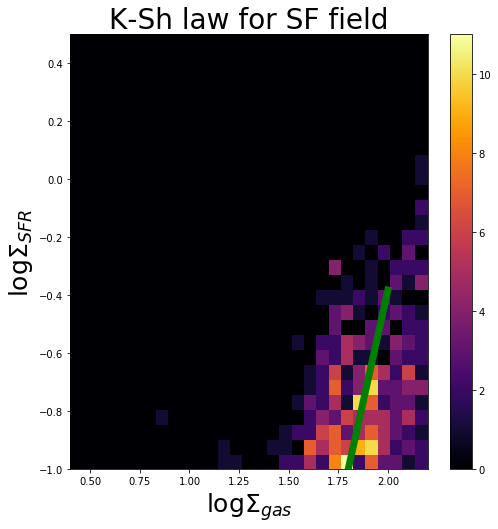

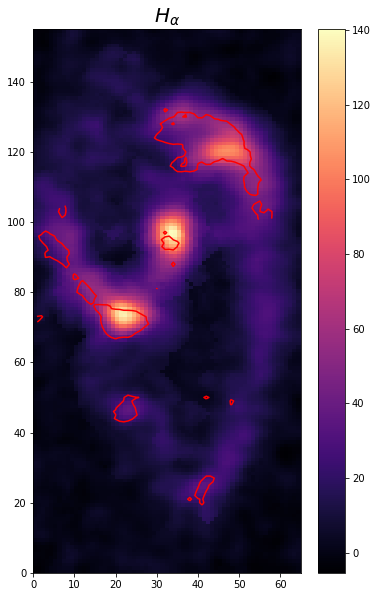

In [50]:

#plt.subplot(1,2,1)
plt.figure(figsize=[8, 8])
xx, yy = np.meshgrid(np.linspace(0.4, 2.2, 30),np.linspace(-1., 0.5, 30))
quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a0=popt[1]*(-1.)+popt[0]
plt.plot([a0, 2.], [a0*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

#plt.subplot(1,2,2)
plt.figure(figsize=[6, 10])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.1,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Sigma_H2, cmap='magma')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)


### Посмотрим сильно ли будет меняться результат, если мы возьмём $\Sigma_{H2}$, посчитанное через карту коэффицииента $\alpha_{CO}$ 

In [19]:
Sigma_H2_mod = np.load('./data/Sigma_H2_mod.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
H_alpha = np.load('./data/H_alpha.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


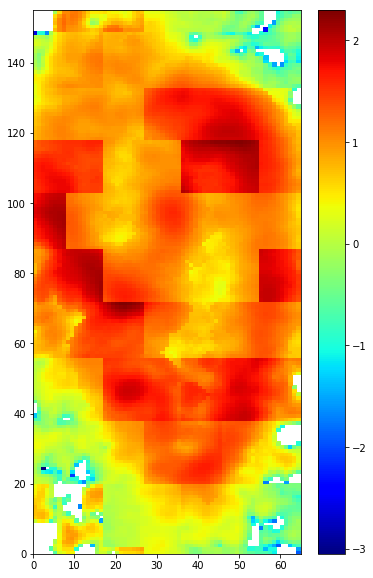

In [20]:
mask = (H_alpha != 0.)
Sigma_g_mod = np.zeros(dist_kpc.shape)
Sigma_g_mod = 1.36*(Sigma_HI + Sigma_H2_mod)
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[6,10])
quadmesh = plt.pcolormesh(X, Y,np.log10(Sigma_g_mod), cmap='jet')
plt.colorbar()

In [21]:
counts = np.zeros((50,30)) 
x = []
y = []

for j, gas in enumerate(np.linspace(0.4, 2.2, 30)):
    for i, hlim in enumerate(np.linspace(-2.0, 0.5, 50)):
       
        for k, row in enumerate(dist_kpc):
            for l, col in enumerate(dist_kpc[0]):
                
                if (H_alpha[k][l] != 0.):
                    if (gas <= np.log10(Sigma_g_mod[k][l]) <= gas+0.05) & (hlim <= np.log10(Sigma_SFR[k][l]) <= hlim+0.05):
                        counts[i][j]+=1
                        x.append(np.log10(Sigma_g_mod[k][l]))
                        y.append(np.log10(Sigma_SFR[k][l]))

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


In [22]:
from scipy.optimize import curve_fit
def func(x, beta,alpha):
    return alpha*x + beta

#guesses = [3.85, 1.5]
popt,pcov = curve_fit(func,y,x)#,p0=guesses)
a =1. / popt[1]
b = -popt[0]/popt[1]
print (popt,pcov)

[2.15771762 0.5419777 ] [[0.00062473 0.00039258]
 [0.00039258 0.00026449]]


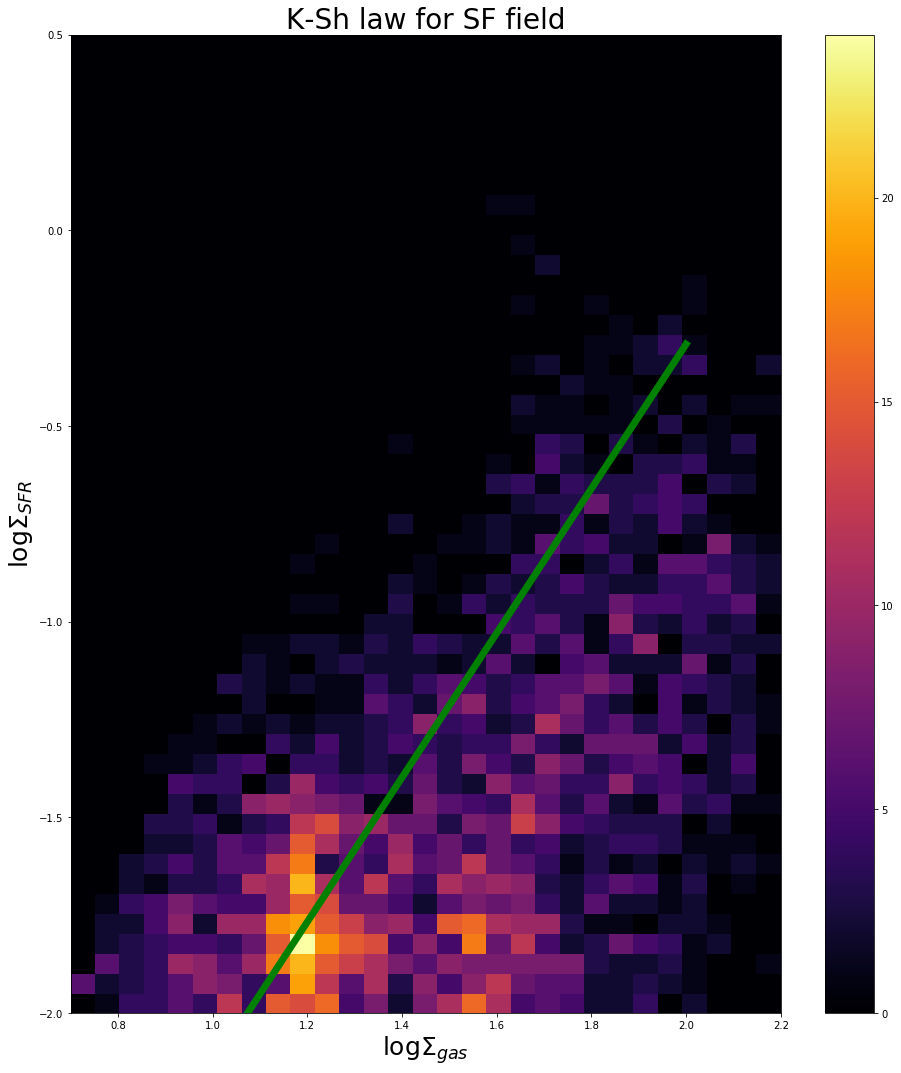

In [23]:
xx, yy = np.meshgrid(np.linspace(0.7, 2.2, 30),np.linspace(-2., 0.5, 50))
fig = plt.figure(figsize=[35, 18])

plt.subplot(1,2,1)

quadmesh = plt.pcolormesh(xx, yy, counts, cmap='inferno')
a0=popt[1]*(-2.)+popt[0]
plt.plot([a0, 2.], [a0*a+b, 2.*a+b], '-', lw=7, color='g')
plt.ylabel(r'$\log{\Sigma_{SFR}}$', fontsize = 25)
plt.xlabel(r'$\log{\Sigma_{gas}}$', fontsize = 25)
plt.title('K-Sh law for SF field', fontsize=28)
plt.colorbar()

In [24]:
def func(x, beta,alpha):
    return alpha*x + beta

In [25]:
from scipy.optimize import curve_fit
inclin_gas = []
std_gas = []

SFR_lim = np.array(np.linspace(0.002,0.5,600))

for lim in SFR_lim:
    x = []
    y = []
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
                
            if (H_alpha[k][l] != 0.):
                        
                if (lim <= Sigma_SFR[k][l]):
                    
                    x.append(np.log10(Sigma_g_mod[k][l]))
                    y.append(np.log10(Sigma_SFR[k][l]))
                            
    popt,pcov = curve_fit(func,y,x)
    inclin_gas.append(1./popt[1])
    std_gas.append(np.sqrt(np.diag(pcov))[0]) 

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

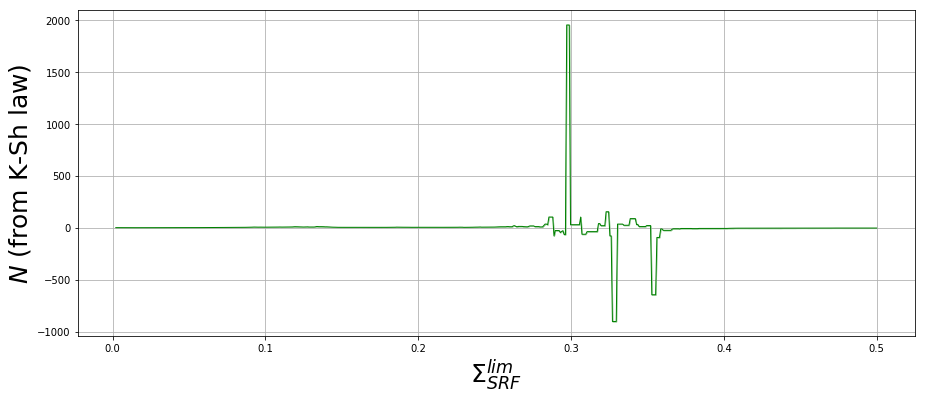

In [26]:
fig = plt.figure(figsize=[15, 6])
plt.plot(SFR_lim, inclin_gas, '-', lw=1, color='g')
plt.fill_between(np.array(SFR_lim), 
                     np.array(inclin_gas) - np.array(std_gas), 
                     np.array(inclin_gas) + np.array(std_gas), alpha=0.3, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)



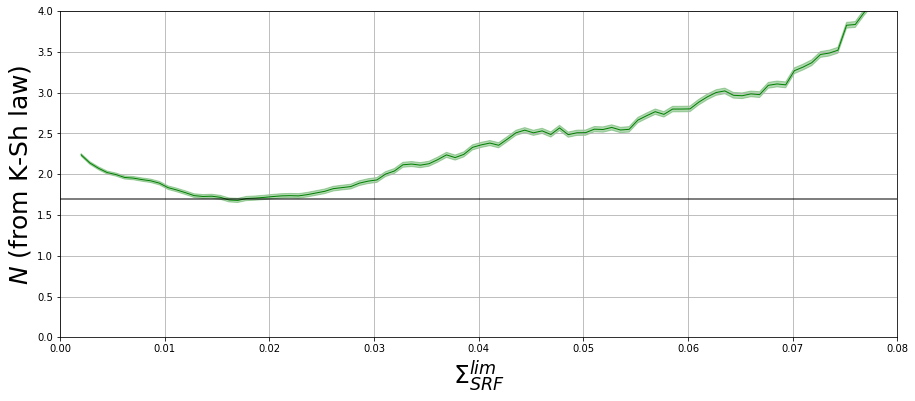

In [27]:
fig = plt.figure(figsize=[15, 6])
plt.plot(SFR_lim, inclin_gas, '-', lw=1, color='g')
plt.fill_between(np.array(SFR_lim), 
                     np.array(inclin_gas) - np.array(std_gas), 
                     np.array(inclin_gas) + np.array(std_gas), alpha=0.3, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)
plt.xlim(0.,0.08)
plt.ylim(0.,4.)
plt.axhline(y = 1.7, alpha=0.5, color='black', lw=2)

Будем строить N для $H_{\alpha}$ и $\Sigma_{H2}$

In [42]:
def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')

N = []

for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept = curve_fit(func,y,x)
    N.append(1./gradient[1])
    

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

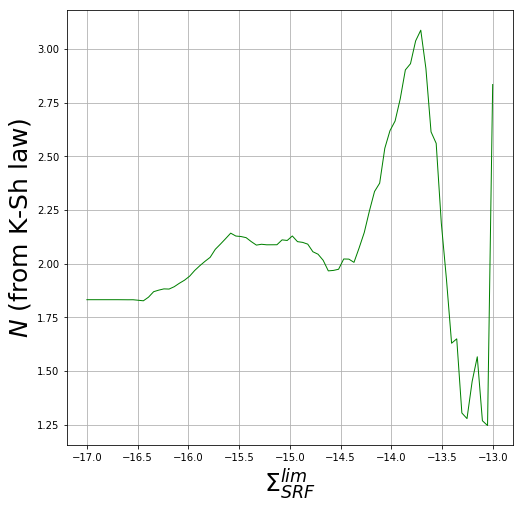

In [43]:
fig = plt.figure(figsize=[8, 8])
plt.plot(np.array(np.linspace(-17.,-13.,80)), N, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


In [44]:
def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')

N = []

for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept = curve_fit(func,x,y)
    N.append(gradient[1])

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

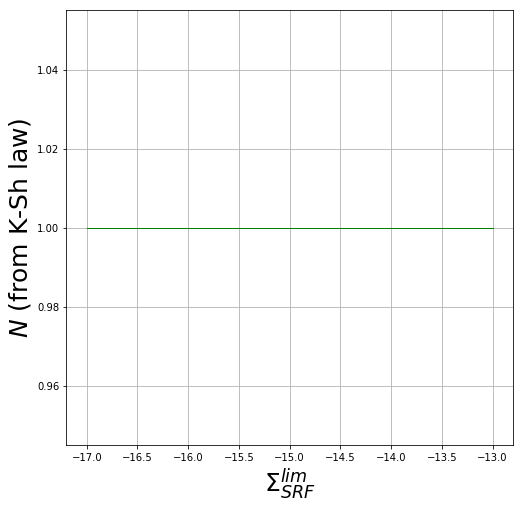

In [45]:
fig = plt.figure(figsize=[8, 8])
plt.plot(np.array(np.linspace(-17.,-13.,80)), N, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)

In [33]:
from scipy import stats

def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')

N = []

for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y,x)
    N.append(1./gradient)
            

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

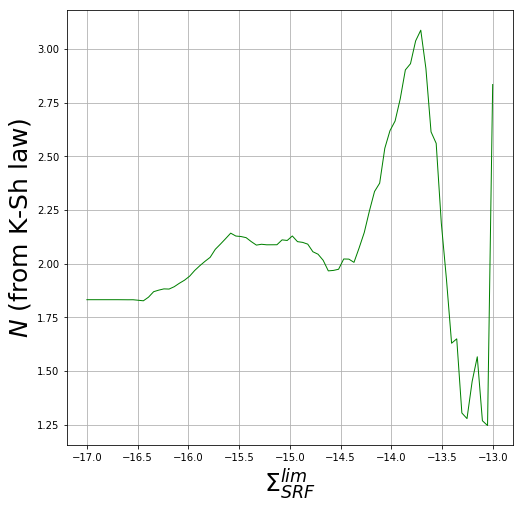

In [34]:
fig = plt.figure(figsize=[8, 8])
plt.plot(np.array(np.linspace(-17.,-13.,80)), N, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


In [35]:
from scipy import stats

def func(x, beta,alpha):
    return alpha*x + beta

H_alpha = np.load('./data/H_alpha.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')

N = []

for hlim in np.array(np.linspace(-17.,-13.,80)):

    x = []
    y = []
    
    for k, row in enumerate(dist_kpc):
        for l, col in enumerate(dist_kpc[0]):
            
            if (np.log10(H_alpha[k][l]) >= hlim) & (Sigma_H2[k][l] > 0.) :
                
                x.append(np.log10(Sigma_H2[k][l]))
                y.append(np.log10(H_alpha[k][l]))
    
    
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    N.append(gradient)

Text(0.5, 0, '$\\Sigma_{SRF}^{lim}$')

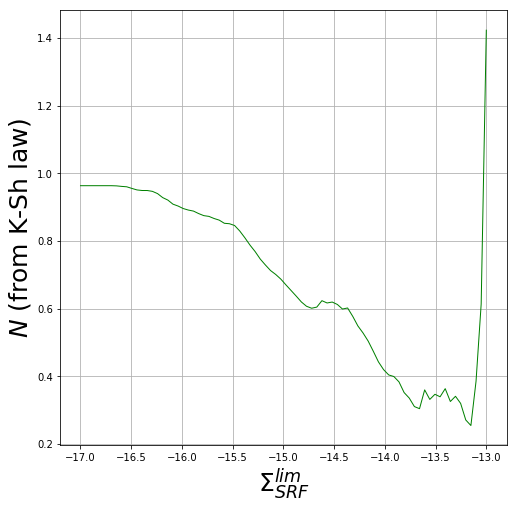

In [36]:
fig = plt.figure(figsize=[8, 8])
plt.plot(np.array(np.linspace(-17.,-13.,80)), N, '-', lw=1, color='g')
plt.grid()
plt.ylabel(r'$N$ (from K-Sh law)', fontsize = 25)
plt.xlabel(r'$\Sigma_{SRF}^{lim}$', fontsize = 25)


#### Статистическими методами был подобран пороги для звёздообразования $\log{H_{alpha}}$, надём эквивалентное им значения $\Sigma_{SFR}$

In [7]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.3,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.032083769677450996


In [8]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.18,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.0422946455755916


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.15,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.04531952924242865


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -14.47,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.02169129046532212


In [5]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -15.05,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.005705390701384224


In [16]:
Sigma_SFR_lim = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 *  np.power(10, -13.26,dtype = np.float)/(scale)**2
print(Sigma_SFR_lim)

0.35179153901404964


#### Нарисуем параметры гравитационной неустойчивости: параметр Тумре $Q_{eff} (Q_{lim} = 3)$ и galaxy shear $(\alpha_A = 3.3)$ со статистически посчитанными для них $\Sigma_{SFR}^{lim}$ равными  0.045 и 0.032 соответственно

In [2]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
shear_method = np.load('./data/shear_method.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
dist_kpc = np.load('./data/dist_kpc.npy')


Text(0.5, 1.0, 'galaxy shear')

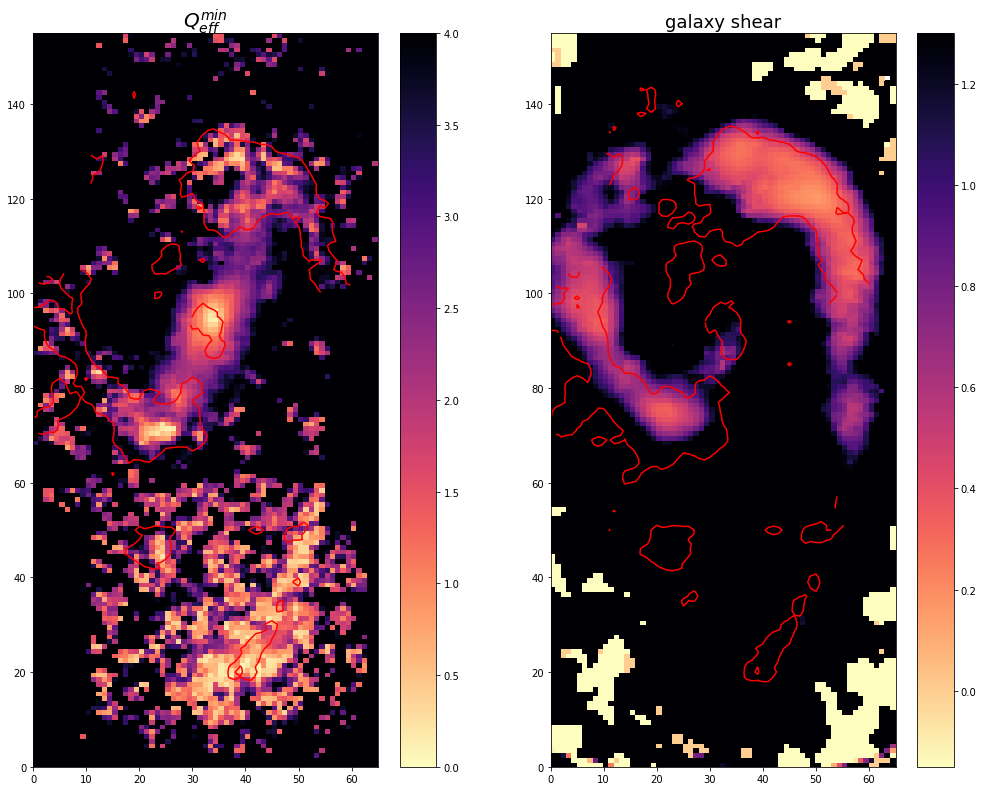

In [5]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax=4)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin=-0.15, vmax = 1.3)
plt.colorbar()
plt.title('galaxy shear', fontsize=18)

In [15]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_min[i][j] <= 3.):
            Inst_field1[i][j] = 1
        else: 
            Inst_field1[i][j] = 0
            
Inst_field3 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(Qeff_max[i][j] <= 3.):
            Inst_field3[i][j] = 1
        else: 
            Inst_field3[i][j] = 0            
            
Inst_field2 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < shear_method[i][j] <= 1.):
            Inst_field2[i][j] = 1
        else: 
            Inst_field2[i][j] = 0            

Text(0.5, 1.0, 'galaxy shear')

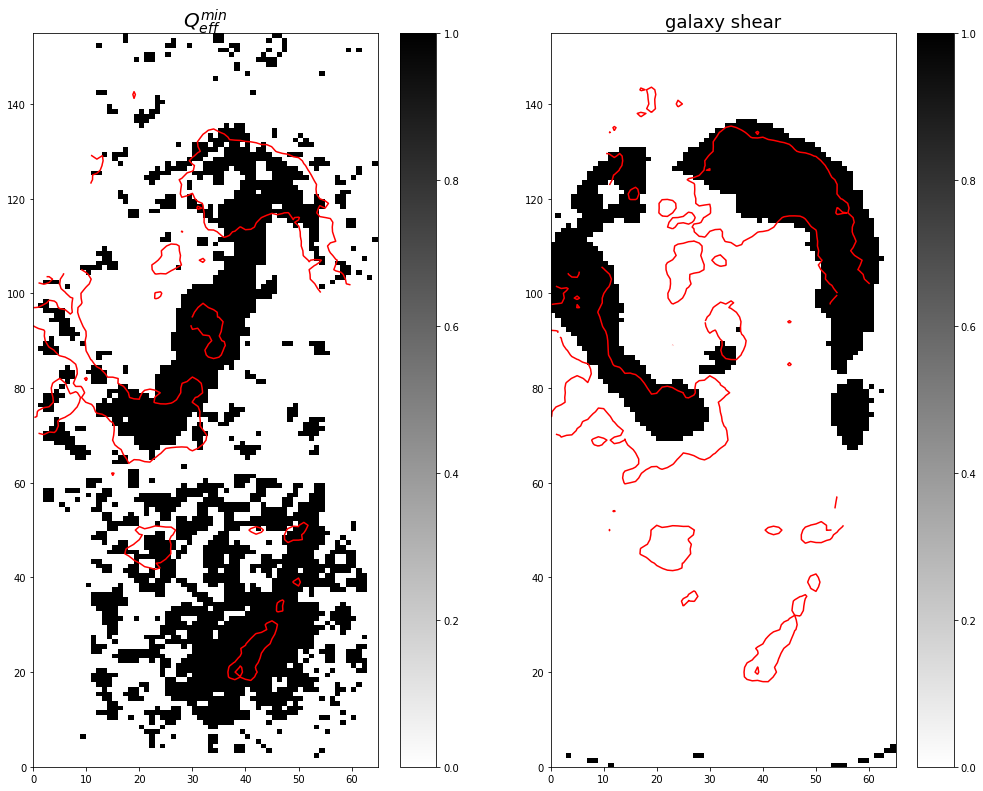

In [16]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field2, cmap='gist_yarg')
plt.colorbar()
plt.title('galaxy shear', fontsize=18)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

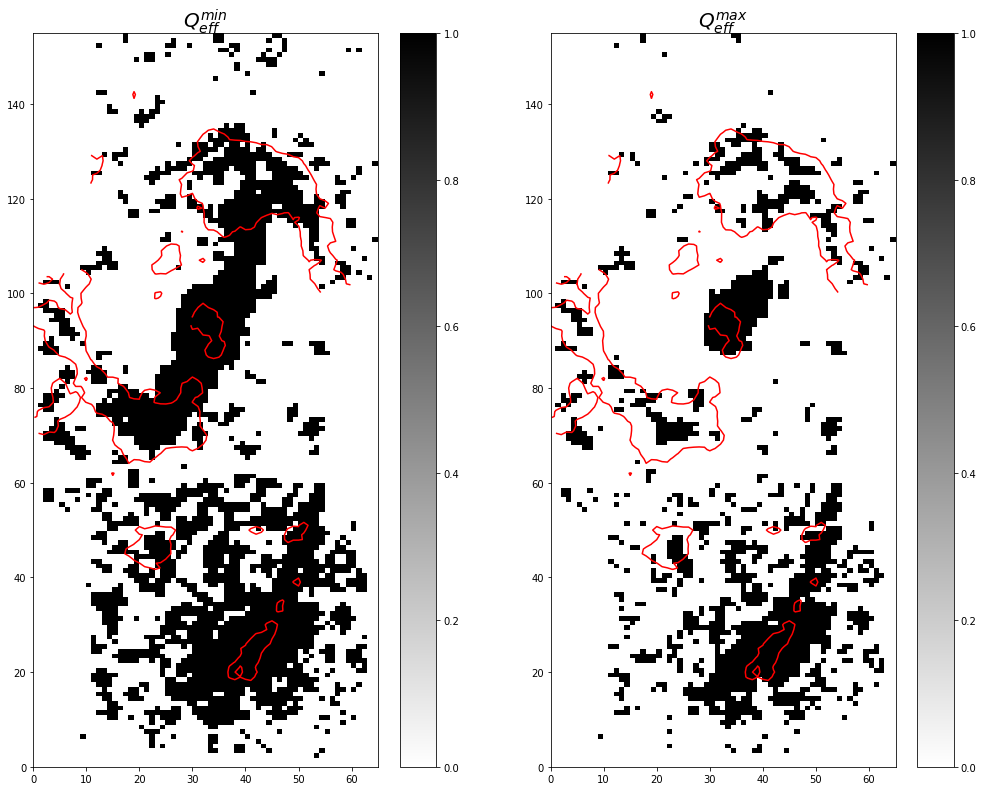

In [17]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field3, cmap='gist_yarg')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)
